In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
pd.set_option("display.max_column", None)
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
house_price=pd.read_csv('House Price-Edit5.csv', encoding= 'unicode_escape' )
house_price.head(40)

,Sale Date,State,District,Address,Building Type,Tenure,Floors,Rooms,Land Area,Built Up Area,Interest Rate,Monthly payment,Minimum Income Formula,School,Hospital,Price psf,Comercial Areas,Purchase Price
0,26/11/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"7,147 ft²","1,344 ft²",3.8,2562.765430,4271.275717,7.40,11.8,77,8.3,"550,000"
1,2/1/2020,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"6,663 ft²","1,335 ft²",3.9,2358.341021,3930.568369,7.40,13.1,75,8.3,"500,000"
2,12/7/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"6,168 ft²","1,344 ft²",3.9,2287.590791,3812.651318,7.40,13.1,79,8.3,"485,000"
3,12/11/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"7,169 ft²","1,344 ft²",3.9,2264.007381,3773.345634,7.40,13.1,67,8.3,"480,000"
4,28/1/2020,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1½,3.0,"6,146 ft²","1,670 ft²",3.9,2169.673740,3616.122900,5.00,8.5,75,5.1,"460,000"
5,16/7/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"6,846 ft²","1,344 ft²",3.9,2028.173278,3380.288797,7.40,13.1,63,8.3,"430,000"
6,24/10/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"7,147 ft²","1,488 ft²",3.9,2004.589868,3340.983114,7.40,13.1,59,8.3,"425,000"
7,18/7/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"9,235 ft²","1,512 ft²",3.9,1971.573094,3285.955157,4.20,8.5,45,5.1,"418,000"
8,20/9/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,2,4.0,"10,689 ft²","2,314 ft²",4.1,1256.315765,2093.859608,3.30,8.3,24,3.3,"260,000"
9,26/7/2018,NEGERI SEMBILAN,SEREMBAN 2,AVIVA GREEN,SEMI-D,FREEHOLD,2,5.0,"3,208 ft²","2,353 ft²",3.8,4566.382040,7610.636733,0.50,7.6,355,2.0,"1,140,000"


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sale Date               3912 non-null   object 
 1   State                   3912 non-null   object 
 2   District                3911 non-null   object 
 3   Address                 3912 non-null   object 
 4   Building Type           3912 non-null   object 
 5   Tenure                  3912 non-null   object 
 6   Floors                  3912 non-null   object 
 7   Rooms                   3341 non-null   float64
 8   Land Area               3912 non-null   object 
 9   Built Up Area           3341 non-null   object 
 10  Interest Rate           3912 non-null   float64
 11  Monthly payment         3912 non-null   float64
 12  Minimum Income Formula  3912 non-null   float64
 13  School                  3912 non-null   float64
 14  Hospital                3912 non-null   

In [5]:
house_price.shape

(3912, 18)

In [6]:
house_price.dtypes.value_counts()

object     10
float64     7
int64       1
dtype: int64

In [7]:
house_price.nunique(dropna=True)

Sale Date                 677
State                       2
District                  108
Address                   684
Building Type               8
Tenure                      2
Floors                      6
Rooms                       6
Land Area                 619
Built Up Area             891
Interest Rate               4
Monthly payment           506
Minimum Income Formula    506
School                     97
Hospital                  201
Price psf                 359
Comercial Areas           197
Purchase Price            552
dtype: int64

## Check duplicate value

In [8]:
duplicate = house_price[house_price.duplicated()]

In [9]:
duplicate

,Sale Date,State,District,Address,Building Type,Tenure,Floors,Rooms,Land Area,Built Up Area,Interest Rate,Monthly payment,Minimum Income Formula,School,Hospital,Price psf,Comercial Areas,Purchase Price
50,12/3/2020,NEGERI SEMBILAN,RANTAU,BANDAR EKAR,TERRACE HOUSE - INTERMEDIATE,FREEHOLD,1½,NaN,"1,401 ft²",NaN,4.2,849.344588,1415.574313,0.70,15.2,201,1.8,"173,684"
243,17/1/2020,MELAKA,BUKIT BARU,KAMPUNG BARU BUKIT BERUANG,BUNGALOW,LEASEHOLD,2,3.0,"6,286 ft²","3,162 ft²",4.1,1207.995928,2013.326546,1.90,5.6,40,2.4,"250,000"
255,3/3/2020,MELAKA,BUKIT KATIL,KAMPUNG BARU TUN RAZAK,BUNGALOW,LEASEHOLD,1,5.0,"5,242 ft²","2,099 ft²",3.9,2264.007381,3773.345634,0.70,8.0,92,5.8,"480,000"
477,10/6/2019,NEGERI SEMBILAN,SEREMBAN 2,SAUJANA SUTERA @ S2 HEIGHTS,TERRACE HOUSE - INTERMEDIATE,FREEHOLD,1,3.0,"1,539 ft²",866 ft²,3.9,1698.005535,2830.009226,4.40,8.2,234,1.5,"360,000"
529,10/10/2019,MELAKA,JASIN,TAMAN AIR MERBAU JAYA FI(RUMAH AWAM A.MERBAU,TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,1,3.0,"1,098 ft²",700 ft²,4.2,523.248376,872.080627,5.00,6.0,97,6.6,"107,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,20/11/2019,MELAKA,TANJONG MINYAK,TAMAN TANJUNG MINYAK PERDANA,BUNGALOW,LEASEHOLD,1,4.0,"4,499 ft²","1,650 ft²",3.9,2240.423970,3734.039951,6.00,12.1,106,1.1,"475,000"
3712,14/11/2019,MELAKA,BUKIT KATIL,TAMAN TASIK UTAMA,SEMI-D,LEASEHOLD,1,4.0,"4,004 ft²","1,386 ft²",3.9,2311.174201,3851.957002,1.50,9.4,122,3.0,"490,000"
3714,8/5/2020,MELAKA,BUKIT KATIL,TAMAN TASIK UTAMA,BUNGALOW,LEASEHOLD,1,4.0,"5,662 ft²","1,470 ft²",3.9,2169.673740,3616.122900,1.50,9.4,81,3.0,"460,000"
3719,2/12/2019,MELAKA,BUKIT KATIL,TAMAN TASIK UTAMA,SEMI-D,LEASEHOLD,2,3.0,"1,647 ft²","1,158 ft²",4.1,1449.595113,2415.991856,1.50,9.4,182,3.0,"300,000"


## Drop The Columns which contain duplicate value

In [10]:
house_price2 = house_price.drop_duplicates()

In [11]:
house_price2.shape

(3842, 18)

In [12]:
house_price2

,Sale Date,State,District,Address,Building Type,Tenure,Floors,Rooms,Land Area,Built Up Area,Interest Rate,Monthly payment,Minimum Income Formula,School,Hospital,Price psf,Comercial Areas,Purchase Price
0,26/11/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"7,147 ft²","1,344 ft²",3.8,2562.765430,4271.275717,7.4,11.8,77,8.30,"550,000"
1,2/1/2020,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"6,663 ft²","1,335 ft²",3.9,2358.341021,3930.568369,7.4,13.1,75,8.30,"500,000"
2,12/7/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"6,168 ft²","1,344 ft²",3.9,2287.590791,3812.651318,7.4,13.1,79,8.30,"485,000"
3,12/11/2019,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1,4.0,"7,169 ft²","1,344 ft²",3.9,2264.007381,3773.345634,7.4,13.1,67,8.30,"480,000"
4,28/1/2020,MELAKA,PEGOH,A FARMOSA GOLF RESORT,BUNGALOW,LEASEHOLD,1½,3.0,"6,146 ft²","1,670 ft²",3.9,2169.673740,3616.122900,5.0,8.5,75,5.10,"460,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,7/2/2020,NEGERI SEMBILAN,SEREMBAN 2,VISION HOMES,CLUSTER HOUSE,FREEHOLD,2,NaN,"1,798 ft²",NaN,3.9,1910.256227,3183.760379,2.6,8.2,225,4.65,"405,000"
3908,4/5/2020,NEGERI SEMBILAN,SEREMBAN 2,VISION HOMES,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,1886.672817,3144.454695,2.6,8.2,222,4.65,"400,000"
3909,28/7/2019,NEGERI SEMBILAN,SEREMBAN 2,VISION HOMES,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,1886.672817,3144.454695,2.6,8.2,222,4.65,"400,000"
3910,25/10/2019,NEGERI SEMBILAN,SEREMBAN 2,VISION HOMES,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,1792.339176,2987.231961,2.6,8.2,211,4.65,"380,000"


## Drop Unnecessary Column

In [13]:
house_price3 = house_price2.drop(['Sale Date','Address','Monthly payment','Price psf'],axis=1)

In [14]:
house_price3

,State,District,Building Type,Tenure,Floors,Rooms,Land Area,Built Up Area,Interest Rate,Minimum Income Formula,School,Hospital,Comercial Areas,Purchase Price
0,MELAKA,PEGOH,BUNGALOW,LEASEHOLD,1,4.0,"7,147 ft²","1,344 ft²",3.8,4271.275717,7.4,11.8,8.30,"550,000"
1,MELAKA,PEGOH,BUNGALOW,LEASEHOLD,1,4.0,"6,663 ft²","1,335 ft²",3.9,3930.568369,7.4,13.1,8.30,"500,000"
2,MELAKA,PEGOH,BUNGALOW,LEASEHOLD,1,4.0,"6,168 ft²","1,344 ft²",3.9,3812.651318,7.4,13.1,8.30,"485,000"
3,MELAKA,PEGOH,BUNGALOW,LEASEHOLD,1,4.0,"7,169 ft²","1,344 ft²",3.9,3773.345634,7.4,13.1,8.30,"480,000"
4,MELAKA,PEGOH,BUNGALOW,LEASEHOLD,1½,3.0,"6,146 ft²","1,670 ft²",3.9,3616.122900,5.0,8.5,5.10,"460,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,NEGERI SEMBILAN,SEREMBAN 2,CLUSTER HOUSE,FREEHOLD,2,NaN,"1,798 ft²",NaN,3.9,3183.760379,2.6,8.2,4.65,"405,000"
3908,NEGERI SEMBILAN,SEREMBAN 2,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,3144.454695,2.6,8.2,4.65,"400,000"
3909,NEGERI SEMBILAN,SEREMBAN 2,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,3144.454695,2.6,8.2,4.65,"400,000"
3910,NEGERI SEMBILAN,SEREMBAN 2,CLUSTER HOUSE,FREEHOLD,2,4.0,"1,798 ft²","1,492 ft²",3.9,2987.231961,2.6,8.2,4.65,"380,000"


## Check Null Value

In [15]:
house_price3.isna().sum()

State                       0
District                    1
Building Type               0
Tenure                      0
Floors                      0
Rooms                     568
Land Area                   0
Built Up Area             568
Interest Rate               0
Minimum Income Formula      0
School                      0
Hospital                    0
Comercial Areas             0
Purchase Price              0
dtype: int64

# Count Categorical Type

In [ ]:
house_price3['Building Type'].value_counts()

In [ ]:
house_price3['Floors'].value_counts()

In [ ]:
house_price3['District'].value_counts()

## Change data type

In [16]:
house_price3["Land Area"] = house_price3["Land Area"].str.replace(',','').str.replace('ft²', '').astype(float)

In [17]:
house_price3["Built Up Area"] = house_price3["Built Up Area"].str.replace(',','').str.replace('ft²', '').astype(float)

In [18]:
house_price3['Floors'] =  house_price["Floors"].str.replace('1½','1.5').str.replace('2½','2.5').str.replace('3½','3.5').astype(float)

In [19]:
house_price3['Purchase Price'] =  house_price3["Purchase Price"].str.replace(',','').astype(float)

In [20]:
house_price3['State']= pd.Categorical(house_price3['State'],  ordered=True)

In [21]:
house_price3['District']= pd.Categorical(house_price3['District'],  ordered=True)

In [22]:
house_price3['Building Type']= pd.Categorical(house_price3['Building Type'],  ordered=True)

In [23]:
house_price3['Tenure']= pd.Categorical(house_price3['Tenure'],  ordered=True)

In [24]:
house_price3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3911
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   3842 non-null   category
 1   District                3841 non-null   category
 2   Building Type           3842 non-null   category
 3   Tenure                  3842 non-null   category
 4   Floors                  3842 non-null   float64 
 5   Rooms                   3274 non-null   float64 
 6   Land Area               3842 non-null   float64 
 7   Built Up Area           3274 non-null   float64 
 8   Interest Rate           3842 non-null   float64 
 9   Minimum Income Formula  3842 non-null   float64 
 10  School                  3842 non-null   float64 
 11  Hospital                3842 non-null   float64 
 12  Comercial Areas         3842 non-null   float64 
 13  Purchase Price          3842 non-null   float64 
dtypes: category(4), float64(

## Descriptive Analysis

In [ ]:
house_price3['Tenure'].describe() #describe Tenure dataset

In [ ]:
house_price3['District'].describe() #describe District dataset

In [ ]:
house_price3['State'].describe() #describe  State dataset

In [ ]:
house_price3['Building Type'].describe() #describe Buildng Type dataset

In [ ]:
house_price3.describe() #describe House Price distribution

In [ ]:
house_price3['State'].hist(bins=10, grid=None)
plt.title("State")

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 18
BIGGER_SIZE = 12


In [ ]:
house_price3['Building Type'].hist(bins=30, grid=None)
plt.title("Building Type")
plt.rc('xtick', labelsize=MEDIUM_SIZE) 

In [ ]:

house_price3['Tenure'].hist(bins=2, grid=None)
plt.xlabel('Tenure', fontsize=18)
plt.ylabel('count', fontsize=18) 

In [ ]:
house_price3['District'].hist(bins=10, grid=None)
plt.title("District")

## Feature Engineering  - transform category data into number using labelencoder

In [25]:
labelencoder=LabelEncoder()

house_price3['Tenure'] = labelencoder.fit_transform(house_price3['Tenure']) 

In [26]:
labelencoder=LabelEncoder()

house_price3['Building Type'] = labelencoder.fit_transform(house_price3['Building Type'])

In [27]:
labelencoder=LabelEncoder()


house_price3['State'] = labelencoder.fit_transform(house_price3['State'])

In [28]:
labelencoder=LabelEncoder()


house_price3['District'] = labelencoder.fit_transform(house_price3['District'])

In [29]:
house_price3.head(5)

,State,District,Building Type,Tenure,Floors,Rooms,Land Area,Built Up Area,Interest Rate,Minimum Income Formula,School,Hospital,Comercial Areas,Purchase Price
0,0,61,0,1,1.0,4.0,7147.0,1344.0,3.8,4271.275717,7.4,11.8,8.3,550000.0
1,0,61,0,1,1.0,4.0,6663.0,1335.0,3.9,3930.568369,7.4,13.1,8.3,500000.0
2,0,61,0,1,1.0,4.0,6168.0,1344.0,3.9,3812.651318,7.4,13.1,8.3,485000.0
3,0,61,0,1,1.0,4.0,7169.0,1344.0,3.9,3773.345634,7.4,13.1,8.3,480000.0
4,0,61,0,1,1.5,3.0,6146.0,1670.0,3.9,3616.122900,5.0,8.5,5.1,460000.0


In [30]:
house_price3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3911
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3842 non-null   int32  
 1   District                3842 non-null   int32  
 2   Building Type           3842 non-null   int32  
 3   Tenure                  3842 non-null   int32  
 4   Floors                  3842 non-null   float64
 5   Rooms                   3274 non-null   float64
 6   Land Area               3842 non-null   float64
 7   Built Up Area           3274 non-null   float64
 8   Interest Rate           3842 non-null   float64
 9   Minimum Income Formula  3842 non-null   float64
 10  School                  3842 non-null   float64
 11  Hospital                3842 non-null   float64
 12  Comercial Areas         3842 non-null   float64
 13  Purchase Price          3842 non-null   float64
dtypes: float64(10), int32(4)
memory usage: 3

## Imputed Missing Value

In [31]:
house_price3['Rooms'].fillna(house_price3['Rooms'].median(), inplace=True) # using median as it is a numerical data. Mean is not suitable as data is skewed. 

In [32]:
house_price3= house_price3.fillna({
    'Built Up Area': house_price3['Built Up Area'].median() # using median as it is a numerical data. Mean is not suitable as data is skewed. 
})

In [33]:
house_price3.isna().sum()

State                     0
District                  0
Building Type             0
Tenure                    0
Floors                    0
Rooms                     0
Land Area                 0
Built Up Area             0
Interest Rate             0
Minimum Income Formula    0
School                    0
Hospital                  0
Comercial Areas           0
Purchase Price            0
dtype: int64

# EDA

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(house_price3['Built Up Area'],color ="brown", bins=30)
plt.xlabel("House prices in RM1000")
plt.show()

In [ ]:
from scipy import stats

In [ ]:
fig = plt.figure()
res = stats.probplot(house_price3['Built Up Area'], plot=plt)

In [ ]:
house_price3['Log_Built Up Area']=np.log(house_price3['Built Up Area']+1)
plt.hist(house_price3['Log_Built Up Area'],color ="brown", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [ ]:
sns.boxplot(x=house_price3['Purchase Price'])

# Outlier

In [34]:
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet


In [35]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


In [38]:
df_x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','School','Hospital','Comercial Areas']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','School','Hospital','Comercial Areas']])
df_x.head()

,Land Area,Floors,Rooms,Built Up Area,Minimum Income Formula,Interest Rate,School,Hospital,Comercial Areas,mahala
0,7147.0,1.0,4.0,1344.0,4271.275717,3.8,7.4,11.8,8.3,34.726682
1,6663.0,1.0,4.0,1335.0,3930.568369,3.9,7.4,13.1,8.3,28.311675
2,6168.0,1.0,4.0,1344.0,3812.651318,3.9,7.4,13.1,8.3,26.839489
3,7169.0,1.0,4.0,1344.0,3773.345634,3.9,7.4,13.1,8.3,29.988290
4,6146.0,1.5,3.0,1670.0,3616.122900,3.9,5.0,8.5,5.1,13.855935


In [42]:
# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(200)

,Land Area,Floors,Rooms,Built Up Area,Minimum Income Formula,Interest Rate,School,Hospital,Comercial Areas,mahala,p_value
0,7147.0,1.0,4.0,1344.0,4271.275717,3.8,7.4,11.8,8.3,34.726682,2.878702e-08
1,6663.0,1.0,4.0,1335.0,3930.568369,3.9,7.4,13.1,8.3,28.311675,7.115376e-07
2,6168.0,1.0,4.0,1344.0,3812.651318,3.9,7.4,13.1,8.3,26.839489,1.485522e-06
3,7169.0,1.0,4.0,1344.0,3773.345634,3.9,7.4,13.1,8.3,29.988290,3.076987e-07
4,6146.0,1.5,3.0,1670.0,3616.122900,3.9,5.0,8.5,5.1,13.855935,9.799907e-04
...,...,...,...,...,...,...,...,...,...,...,...
499,20656.0,1.0,3.0,890.0,1059.537210,4.2,4.9,5.7,5.2,207.766392,0.000000e+00
500,5309.0,2.0,5.0,1819.0,4659.573510,3.8,3.4,6.6,3.6,14.640852,6.618803e-04
501,4801.0,1.0,3.0,1353.0,4659.573510,3.8,3.4,6.6,3.6,13.154344,1.391780e-03
502,7728.0,1.0,5.0,1255.0,4348.935276,3.8,3.4,6.6,3.6,31.885686,1.191547e-07


In [40]:
house_price3.shape

(3842, 14)

In [ ]:
## house_price4 = house_price3.drop([1,8,22,29,34,39,40,54,55,56,58,59,67,69,78,80,83,85,92,94,95,99,100,103,104,108,123,127,131,140,145,146,149,150,163,169,177,196,226,231,232,233,234,235,248,277,285,304,305,308,309,310,321,327,412,417,427,428,431,434,442,444,459,476,477,480,481,486,491,501,504,505,507],axis=0)

In [ ]:
#house_price5 = house_price3.drop([1,2,8,9,10,22,23,26,27,29,34,38,39,40,44,54,55,56,58,59,67,78,79,80,83,85,90,92,94,95,99,100,103,104,108,123,127,131,134,140,145,146,149,150,163,169,171,176,177,189,195,196,213,217,226,231,232,233,234,235,240,248,277,285,295,304,305,308,309,310,318,321,325,326,327,342,359,363,408,412,417,419,426,427,428,431,434,441,442,444,451,459,476,477,480,481,486,491,492,501,504,505,507],axis=0)

In [ ]:
house_price6 = house_price3.drop([1,2,8,9,10,22,23,26,27,29,34,38,39,40,44,54,55,56,58,59,67,78,79,80,83,85,90,92,94,95,99,100,103,104,108,123,127,131,134,140,145,146,148,149,150,163,169,171,176,177,189,195,196,213,217,226,232,240,248,277,295,310,318,321,325,326,327,342,359,363,408,412,417,419,426,427,428,431,434,441,442,444,451,459,476,477,480,481,486,491,492,501,504,505,507],axis=0)

In [ ]:
house_price6.shape

In [ ]:
house_price5.shape

In [ ]:
Q1=house_price3['Purchase Price'].quantile(0.25)
Q3=house_price3['Purchase Price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Purchase Price']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Purchase Price'])

In [ ]:
sns.boxplot(x=house_price3['Minimum Income'])

In [ ]:
Q1=house_price3['Minimum_Income'].quantile(0.25)
Q3=house_price3['Minimum_Income'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Minimum Income']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Minimum Income'])

In [ ]:
sns.boxplot(x=house_price3['Built_Up_Area'])

In [ ]:
Q1=house_price3['Built Up Area'].quantile(0.25)
Q3=house_price3['Built Up Area'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Built Up Area']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Built Up Area'])

In [ ]:
sns.boxplot(x=house_price3['Land Area'])

In [ ]:
Q1=house_price3['Land Area'].quantile(0.25)
Q3=house_price3['Land Area'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Land Area']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Land Area'])

In [ ]:
sns.boxplot(x=house_price3['Distance between School KM'])

In [ ]:
Q1=house_price3['Distance between School KM'].quantile(0.25)
Q3=house_price3['Distance between School KM'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Distance between School KM']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Distance between School KM'])

In [ ]:
sns.boxplot(x=house_price3['Distance between Hospital, KM'])

In [ ]:
Q1=house_price3['Distance between Hospital, KM'].quantile(0.25)
Q3=house_price3['Distance between Hospital, KM'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LOWER_WHISKER=Q1-1.5*IQR
UPPER_WHISKER=Q3+1.5*IQR
print(LOWER_WHISKER,UPPER_WHISKER)

In [ ]:
house_price3=house_price3[house_price3['Distance between Hospital, KM']<UPPER_WHISKER]
sns.boxplot(x=house_price3['Distance between Hospital, KM'])

# Change Data Type

In [45]:
house_price3['Tenure'] =  house_price3["Tenure"].astype("category")

In [ ]:
house_price6['Tenure'] =  house_price3["Tenure"].astype("category")

In [46]:
house_price3['State'] =  house_price3["State"].astype("category")

In [ ]:
house_price6['State'] =  house_price3["State"].astype("category")

In [47]:
house_price3['Building Type'] =  house_price3["Building Type"].astype("category")

In [ ]:
house_price6['Building Type'] =  house_price3["Building Type"].astype("category")

In [48]:
house_price3['District'] =  house_price3["District"].astype("category")

In [ ]:
house_price6['District'] =  house_price3["District"].astype("category")

In [ ]:
house_price3.head(5)

In [ ]:
house_price3.info()

In [ ]:
house_price3.shape

## Features Selection

## Correlations

<AxesSubplot:>

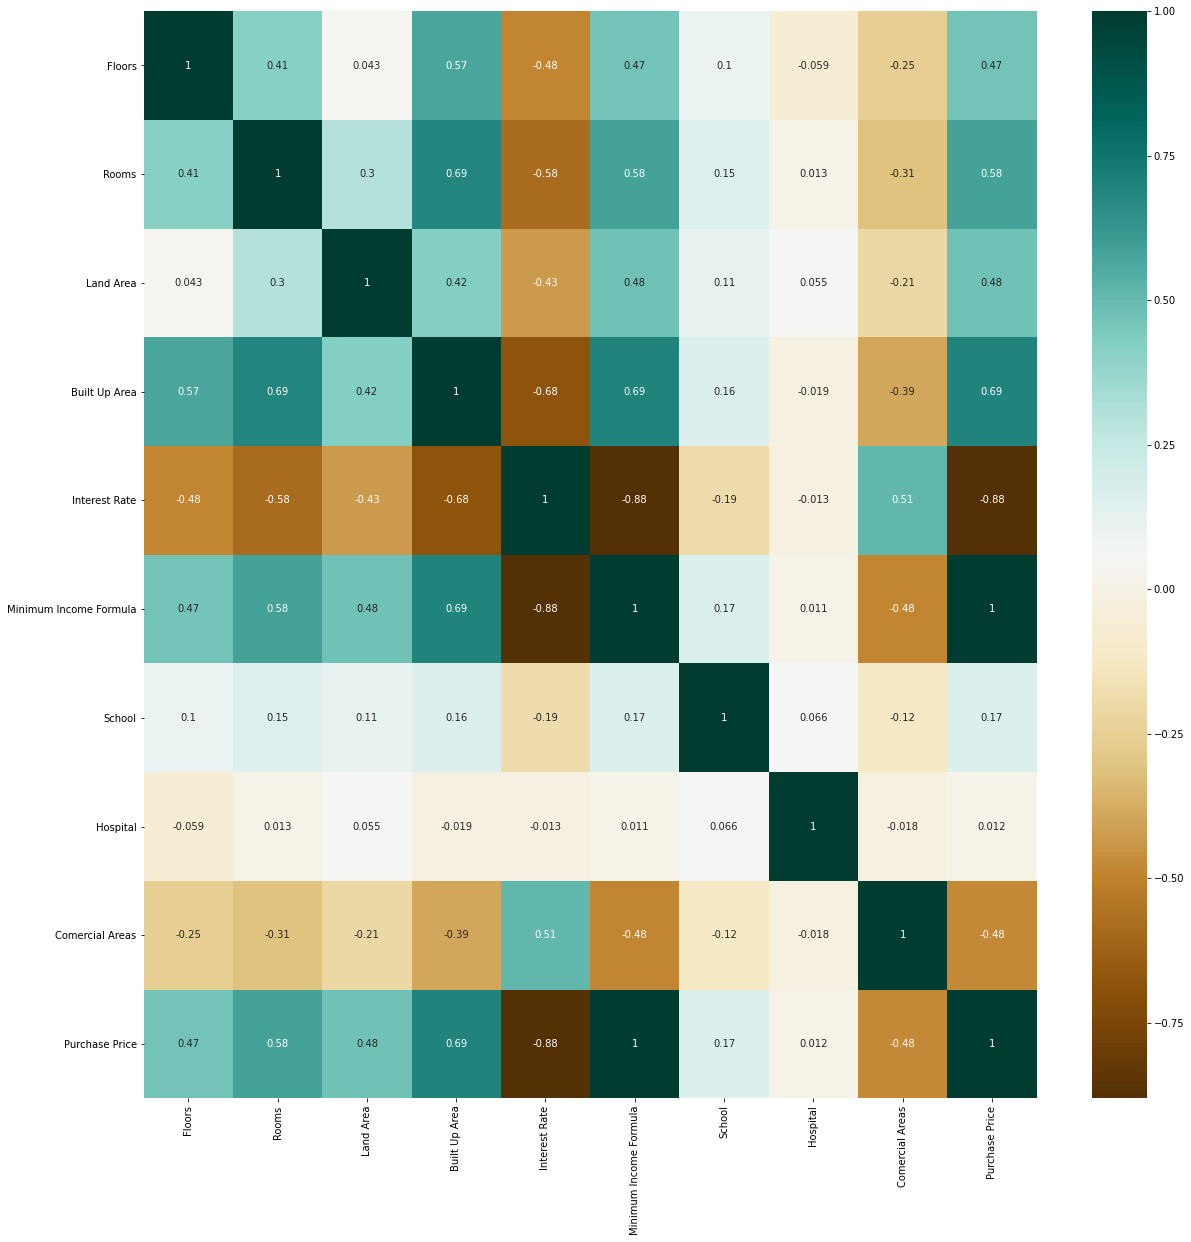

In [49]:
# Finding the relations between the variables.
plt.figure(figsize=(20,20))
c= house_price3.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [50]:
c= house_price3.corr()
correlations= c["Purchase Price"].sort_values(ascending=True)
features=correlations.index[0:5,]

In [51]:
correlations

Interest Rate            -0.880908
Comercial Areas          -0.483393
Hospital                  0.011548
School                    0.167273
Floors                    0.468987
Land Area                 0.476712
Rooms                     0.582198
Built Up Area             0.693913
Minimum Income Formula    0.999372
Purchase Price            1.000000
Name: Purchase Price, dtype: float64

In [52]:
features

Index(['Interest Rate', 'Comercial Areas', 'Hospital', 'School', 'Floors'], dtype='object')

In [53]:
threshold=0.4
a=abs(c['Purchase Price'])
result=a[a>0.4].sort_values(ascending=True)
result

Floors                    0.468987
Land Area                 0.476712
Comercial Areas           0.483393
Rooms                     0.582198
Built Up Area             0.693913
Interest Rate             0.880908
Minimum Income Formula    0.999372
Purchase Price            1.000000
Name: Purchase Price, dtype: float64

## Mutual Information Gain  - Another method finding the relations between the variables.


In [54]:
from sklearn.feature_selection import mutual_info_regression

In [57]:
y = house_price3['Purchase Price']
df_x['mahala'] = mahalanobis(x=df_x, data=house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','School','Hospital','Comercial Areas']])


ValueError: shapes (500,11) and (9,9) not aligned: 11 (dim 1) != 9 (dim 0)

In [56]:
importances = mutual_info_regression(x, y)
importances

NameError: name 'x' is not defined

In [ ]:
importances_info = pd.Series(importances)
importances_info.index = x.columns
importances_info.sort_values(ascending=True)

In [ ]:
importances_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(x, y)
x.columns[sel_five_cols.get_support()]

In [ ]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(x, y)
selected_top_columns.get_support()
x.columns[selected_top_columns.get_support()]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
y = house_price3['Purchase Price']
x = house_price3[['Tenure','District','Building Type','State']]

In [ ]:
importances_info= mutual_info_classif(x, y)
importances_info

In [ ]:
importances_info = pd.Series(importances)
importances_info.index = x.columns
importances_info.sort_values(ascending=True)

## Variance Threshold - Another method finding the relations between the variables.


In [ ]:
from sklearn.feature_selection import VarianceThreshold
x = house_price3[['Land Area', 'Rooms','Floors','Built Up Area','Minimum Income Formula','Interest Rate','Tenure','State','Building Type','District']]

selector=VarianceThreshold(threshold=+-0.16)
selector.fit(x)
selector.get_support()

## MAD - Another method finding the relations between the variables.


In [ ]:
x = house_price4[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income','Interest Rate','Distance between Hospital','Distance between School']]

In [ ]:
mean_MAD=np.sum(np.abs(x-np.mean(x, axis=0)), axis=0)/x.shape[0]
plt.bar(np.arange(x.shape[1]),mean_MAD, color='teal')

# UNIVARIATE SELECTION - Another method finding the relations between the variables.


# Feature Extraction with Univariate Statistical Tests (f_regression)

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [58]:
y = house_price3['Purchase Price']
#x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Distance between Hospital, KM','Distance between School KM']]
x=house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','School','Hospital','Comercial Areas']]


In [59]:
names=pd.DataFrame(x.columns)

In [62]:
model = SelectKBest(score_func=f_regression, k='all')
results = model.fit(x, y)

In [63]:
#print (results.scores_)
print(results.scores_)

results_df=pd.DataFrame(results.scores_)
results_df2=pd.DataFrame(results.pvalues_)
#Concat and name columns
scored=pd.concat([names,results_df,results_df2], axis=1)
scored.columns = ["Feature", "Score", "P values"]
scored.sort_values(by=['Score']).head(10)


[1.12929619e+03 1.08275298e+03 1.96897791e+03 3.56620115e+03
 3.05618579e+06 1.33027328e+04 1.10536917e+02 5.12199063e-01
 1.17088747e+03]


,Feature,Score,P values
7,Hospital,5.121991e-01,4.742320e-01
6,School,1.105369e+02,1.654514e-25
1,Floors,1.082753e+03,2.063913e-209
0,Land Area,1.129296e+03,2.889892e-217
8,Comercial Areas,1.170887e+03,3.198147e-224
2,Rooms,1.968978e+03,0.000000e+00
3,Built Up Area,3.566201e+03,0.000000e+00
5,Interest Rate,1.330273e+04,0.000000e+00
4,Minimum Income Formula,3.056186e+06,0.000000e+00


In [64]:
pip install --upgrade patsy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install statsmodels

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# the independent variables set
x=house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','School','Hospital','Comercial Areas']]


In [68]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [70]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [71]:
print(vif_data)

                  feature        VIF
0               Land Area   3.735726
1                  Floors  14.682979
2                   Rooms  61.149052
3           Built Up Area  18.030801
4  Minimum Income Formula   9.105665
5           Interest Rate  51.617454
6                  School   2.582524
7                Hospital   3.517313
8         Comercial Areas   7.901211


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
y = house_price3['Purchase Price']
x = house_price3[['Land Area', 'Interest Rate', 'Minimum Income Formula','Tenure','Floors']]

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
fit=lr.fit(X_train, y_train)

In [ ]:
#predicting the value
y_predict = lr.predict([[3326.0, 4.2, 163, 0]])
print("Predicted Price = RM", y_predict[0])

## ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
CategoryGroupLists1=house_price3.groupby('State')['Purchase Price'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists1)
print('P-Value for Anova is: ', AnovaResults[1])

In [ ]:
CategoryGroupLists2=house_price3.groupby('Tenure')['Purchase Price'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists2)
print('P-Value for Anova is: ', AnovaResults[1])

In [ ]:
CategoryGroupLists3=house_price3.groupby('Building Type')['Purchase Price'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists3)
print('P-Value for Anova is: ', AnovaResults[1])

In [ ]:
CategoryGroupLists3=house_price3.groupby('District')['Purchase Price'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists3)
print('P-Value for Anova is: ', AnovaResults[1])

In [ ]:
import pingouin as pg

In [ ]:
aov = pg.anova(dv='Purchase Price', between=[ 'District'], data=house_price3,
             detailed=True)

print(aov)

In [ ]:
import researchpy as rp

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
house_price3["PP"] = house_price3["Purchase Price"]

model = ols("PP~   C(Tenure, Sum) + C(State, Sum)  + C(Tenure, Sum):C(State , Sum)", data=house_price3).fit()


aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

In [ ]:
house_price3["PP"] = house_price3["Purchase Price"]

model = ols("PP~   C(Tenure, Sum) + C(State, Sum) + C(Tenure, Sum):C(State, Sum) ", data=house_price3).fit()


aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

In [ ]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Tenure_" + house_price3.Tenure.astype(str) + " & " + "State_" + house_price3.State.astype(str)

comp = mc.MultiComparison(house_price3["PP"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

## Transformation

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = house_price3.columns
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(house_price3)
house_price3 = pd.DataFrame(d, columns=names)
house_price3.head()

In [ ]:
house_price3['Tenure'] =  house_price3["Tenure"].astype("category")

In [ ]:
house_price3['State'] =  house_price3["State"].astype("category")

In [ ]:
house_price3['Building Type'] =  house_price3["Building Type"].astype("category")

In [ ]:
house_price3['District'] =  house_price3["District"].astype("category")

In [ ]:
house_price3.info()

# Model Prediction

## Random Forest Model

In [ ]:
house_price4=house_price3.drop(['State','District','Building Type','Tenure','Floors','Rooms','Built Up Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price4.head(5)

In [ ]:
X = house_price4.iloc[:, 0:1].values
y = house_price4.iloc[:, 1].values

In [ ]:
y = house_price3['Purchase Price']
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State']]

In [ ]:
#y = house_price3['Purchase Price']
#x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between Hospital, KM','Distance between School KM']]

In [ ]:
#y = house_price4['Purchase Price']
#x = house_price4[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Distance between School KM','Distance between Hospital, KM']]

In [ ]:
y = house_price3['Purchase Price']
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State']]

In [ ]:
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM','Distance between Hospital, KM']]

In [ ]:
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM']]

In [ ]:
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between Hospital, KM']]

In [ ]:
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between Hospital, KM']]

In [ ]:
y = house_price6['Purchase Price']
x = house_price6[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State']]

In [ ]:
y = house_price6['Purchase Price']
x = house_price6[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State']]

In [ ]:
x = house_price6[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM','Distance between Hospital, KM']]

In [ ]:
x = house_price6[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM']]

In [ ]:
x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM']]

In [ ]:
#x=house_price3[['Land Area', 'Rooms','Built Up Area','Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Price psf']]

In [ ]:
#y = house_price3['Purchase Price']
#x = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Price psf']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
#predicting the value
y_predict = regressor.predict([[1399.0, 2, 3, 888.0, 1467.051521, 4.2, 1, 74, 6, 1, 1.9]])
print("Predicted Price = RM", y_predict[0])

In [ ]:
#predicting the value
y_predict = regressor.predict([[1539.0, 1, 3, 700.0,81.502862, 4.2, 0, 49, 6, 0,0.65,9.1]])
print("Predicted Price = RM", y_predict[0])

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

# SVR MODEL

In [ ]:
'Distance between Hospital, KM','Distance between School KM'

In [ ]:
y = house_price3['Purchase Price']
x = house_price3[['Land Area','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Tenure','District','Building Type','State','Distance between School KM']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
#predicting the value
y_predict = regressor.predict([[958.0, 2, 3.0, 668.0,815.028623, 4.2, 0, 86, 6, 1]])
print("Predicted Price = RM", y_predict[0])

In [ ]:
#predicting the value
y_predict = regressor.predict([[1600.0, 3, 888.0,431.965170, 4.2, 0, 75, 6, 1,0.16,3.7]])
print("Predicted Price = RM", y_predict[0])

In [ ]:
house_price3.head(5)

In [ ]:
#predicting the value
y_predict = regressor.predict([[1539.0, 1, 3, 700.0, 81.502862, 4.2, 0, 49, 6, 0]])
print("Predicted Price = RM", y_predict[0])

In [ ]:
house_price5.head(5)

In [ ]:
house_price5=house_price3.drop(['Interest Rate','Min Income'], axis=1)

In [ ]:
house_price5.head(5)

In [ ]:
X = house_price5.iloc[:, 0:11].values
y = house_price5.iloc[:, 11].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape()

In [ ]:
X_test.shape()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Built Up Area Attribute

In [ ]:
house_price5=house_price3.drop(['State','District','Building Type','Tenure','Floors','Rooms','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price5.head(5)

In [ ]:
X = house_price5.iloc[:, 0:1].values
y = house_price5.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Floors Attribute 

In [ ]:
house_price6=house_price3.drop(['State','District','Building Type','Tenure','Built Up Area','Rooms','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price6.head(5)

In [ ]:
X = house_price6.iloc[:, 0:1].values
y = house_price6.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Rooms Attribute 

In [ ]:
house_price7=house_price3.drop(['State','District','Building Type','Tenure','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price7.head(5)

In [ ]:
X = house_price7.iloc[:, 0:1].values
y = house_price7.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select State Attribute 

In [ ]:
house_price8=house_price3.drop(['Rooms','District','Building Type','Tenure','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price8.head(5)

In [ ]:
X = house_price8.iloc[:, 0:1].values
y = house_price8.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Building Type Attribute 


In [ ]:
house_price9=house_price3.drop(['Rooms','District','State','Tenure','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price9.head(5)

In [ ]:
X = house_price9.iloc[:, 0:1].values
y = house_price9.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Tenure Attribute 


In [ ]:
house_price10=house_price3.drop(['Rooms','District','State','Building Type','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Distance between Hospital, KM'], axis=1)

In [ ]:
house_price10.head(5)

In [ ]:
X = house_price10.iloc[:, 0:1].values
y = house_price10.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Hospital Attribute 


In [ ]:
house_price11=house_price3.drop(['Rooms','District','State','Building Type','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between School KM','Tenure'], axis=1)

In [ ]:
house_price11.head(5)

In [ ]:
X = house_price11.iloc[:, 0:1].values
y = house_price11.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select School Attribute 

In [ ]:
house_price12=house_price3.drop(['Rooms','District','State','Building Type','Built Up Area','Floors','Land Area','Price psf','Interest Rate','Minimum Income','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price12.head(5)

In [ ]:
X = house_price12.iloc[:, 0:1].values
y = house_price12.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf Attribute 

In [ ]:
house_price13=house_price3.drop(['Rooms','District','State','Building Type','Built Up Area','Floors','Land Area','Distance between School KM','Interest Rate','Minimum Income','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price13.head(5)

In [ ]:
X = house_price13.iloc[:, 0:1].values
y = house_price13.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select District Attribute 

In [ ]:
house_price14=house_price3.drop(['Rooms','Price psf','State','Building Type','Built Up Area','Floors','Land Area','Distance between School KM','Interest Rate','Minimum Income','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price14.head(5)

In [ ]:
X = house_price14.iloc[:, 0:1].values
y = house_price14.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select District Attribute 

In [ ]:
house_price14=house_price3.drop(['Rooms','Price psf','State','Building Type','Built Up Area','Floors','Land Area','Distance between School KM','Interest Rate','District','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
y = house_price3['Purchase Price']
X = house_price3[['Land Area','Floors','Rooms','Built Up Area', 'Minimum Income Formula','Interest Rate','Distance between School KM','Tenure','District','Building Type','State']]

In [ ]:
house_price14.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X = house_price14.iloc[:, 0:1].values
y = house_price14.iloc[:, 1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Interest RAte Attribute 


In [ ]:
house_price14=house_price3.drop(['Rooms','Price psf','State','Building Type','Built Up Area','Floors','Land Area','Distance between School KM','Minimum Income','District','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price14.head(5)

In [ ]:
X = house_price14.iloc[:, 0:1].values
y = house_price14.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + Land Area Attribute 


In [ ]:
house_price15=house_price3.drop(['Rooms','District','State','Building Type','Built Up Area','Floors','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price15.head(5)

In [ ]:
X = house_price15.iloc[:, 0:2].values
y = house_price15.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + Built up area Attribute 


In [ ]:
house_price16=house_price3.drop(['Rooms','District','State','Building Type','Land Area','Floors','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price16.head(5)

In [ ]:
X = house_price16.iloc[:, 0:2].values
y = house_price16.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + floor Attribute 


In [ ]:
house_price17=house_price3.drop(['Rooms','District','State','Building Type','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price17.head(5)

In [ ]:
X = house_price17.iloc[:, 0:2].values
y = house_price17.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + rooms Attribute 

In [ ]:
house_price18=house_price3.drop(['Floors','District','State','Building Type','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price18.head(5)

In [ ]:
X = house_price18.iloc[:, 0:2].values
y = house_price18.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + state Attribute 

In [ ]:
house_price19=house_price3.drop(['Floors','District','Rooms','Building Type','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price19.head(5)

In [ ]:
X = house_price19.iloc[:, 0:2].values
y = house_price19.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + building type Attribute 


In [ ]:
house_price20=house_price3.drop(['Floors','District','Rooms','State','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Tenure'], axis=1)

In [ ]:
house_price20.head(5)

In [ ]:
X = house_price20.iloc[:, 0:2].values
y = house_price20.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + tenure Attribute 


In [ ]:
house_price21=house_price3.drop(['Floors','District','Rooms','State','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Distance between Hospital, KM','Building Type'], axis=1)

In [ ]:
house_price21.head(5)

In [ ]:
X = house_price21.iloc[:, 0:2].values
y = house_price21.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + hospital Attribute 

In [ ]:
house_price22=house_price3.drop(['Floors','District','Rooms','State','Land Area','Built Up Area','Distance between School KM','Interest Rate','Price psf','Tenure','Building Type'], axis=1)

In [ ]:
house_price22.head(5)

In [ ]:
X = house_price22.iloc[:, 0:2].values
y = house_price22.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + school Attribute 


In [ ]:
house_price23=house_price3.drop(['Floors','District','Rooms','State','Land Area','Built Up Area','Distance between Hospital, KM','Interest Rate','Price psf','Tenure','Building Type'], axis=1)

In [ ]:
house_price23.head(5)

In [ ]:
X = house_price23.iloc[:, 0:2].values
y = house_price23.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Price psf + district Attribute 


In [ ]:
house_price24=house_price3.drop(['Floors','Distance between School KM','Rooms','State','Land Area','Built Up Area','Distance between Hospital, KM','Interest Rate','Price psf','Tenure','Building Type'], axis=1)

In [ ]:
house_price24.head(5)

In [ ]:
X = house_price24.iloc[:, 0:2].values
y = house_price24.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
house_price24=house_price3.drop(['Floors','Distance between School KM','Rooms','State','Land Area','Built Up Area','Distance between Hospital, KM','District','Price psf','Tenure','Building Type'], axis=1)

In [ ]:
house_price24.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf +Built Up Area Attribute 


In [ ]:
house_price25=house_price3.drop(['Floors','Distance between School KM','Rooms','State','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price25.head(5)

In [ ]:
X = house_price25.iloc[:, 0:3].values
y = house_price25.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf +Floorsa Attribute 


In [ ]:
house_price26=house_price3.drop(['Built Up Area','Distance between School KM','Rooms','State','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price26.head(5)

In [ ]:
X = house_price26.iloc[:, 0:3].values
y = house_price26.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf +rooms Attribute 


In [ ]:
house_price27=house_price3.drop(['Built Up Area','Distance between School KM','Floors','State','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price27.head(5)

In [ ]:
X = house_price27.iloc[:, 0:3].values
y = house_price27.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf +state Attribute 


In [ ]:
house_price28=house_price3.drop(['Built Up Area','Distance between School KM','Floors','Rooms','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price28.head(5)

In [ ]:
X = house_price28.iloc[:, 0:3].values
y = house_price28.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf +building type Attribute 


In [ ]:
house_price29=house_price3.drop(['Built Up Area','Distance between School KM','Floors','Rooms','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','State', 'District'], axis=1)

In [ ]:
house_price29.head(5)

In [ ]:
X = house_price29.iloc[:, 0:3].values
y = house_price29.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf + tenure Attribute 


In [ ]:
house_price30=house_price3.drop(['Built Up Area','Distance between School KM','Floors','Rooms','Distance between Hospital, KM','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price30.head(5)

In [ ]:
X = house_price30.iloc[:, 0:3].values
y = house_price30.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf + hospital Attribute 


In [ ]:
house_price31=house_price3.drop(['Built Up Area','Distance between School KM','Floors','Rooms','Tenure','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price31.head(5)

In [ ]:
X = house_price31.iloc[:, 0:3].values
y = house_price31.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf + school Attribute 


In [ ]:
house_price32=house_price3.drop(['Built Up Area','Distance between Hospital, KM','Floors','Rooms','Tenure','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price32.head(5)

In [ ]:
X = house_price32.iloc[:, 0:3].values
y = house_price32.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select land area + price psf + district Attribute 


In [ ]:
house_price33=house_price3.drop(['Built Up Area','Distance between Hospital, KM','Floors','Rooms','Tenure','Interest Rate','Min Income','Building Type','State', 'Distance between School KM'], axis=1)

In [ ]:
house_price33.head(5)

In [ ]:
X = house_price33.iloc[:, 0:3].values
y = house_price33.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select floor +rooms + land area + price psf  Attribute 


In [ ]:
house_price34=house_price3.drop(['Distance between School KM','Building Type','State','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District','Built Up Area'], axis=1)

In [ ]:
house_price34.head(5)

In [ ]:
X = house_price34.iloc[:, 0:4].values
y = house_price34.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select rooms +built up area + land area + price psf  Attribute 


In [ ]:
house_price35=house_price3.drop(['Distance between School KM','Floors','State','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price35.head(5)

In [ ]:
X = house_price35.iloc[:, 0:4].values
y = house_price35.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state +built up area + land area + price psf  Attribute 


In [ ]:
house_price36=house_price3.drop(['Distance between School KM','Floors','Built Up Area','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District'], axis=1)

In [ ]:
house_price36.head(5)

In [ ]:
X = house_price36.iloc[:, 0:4].values
y = house_price36.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select building type +built up area + land area + price psf  Attribute 


In [ ]:
house_price37=house_price3.drop(['Distance between School KM','Floors','Built Up Area','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','State', 'District'], axis=1)

In [ ]:
house_price37.head(5)

In [ ]:
X = house_price37.iloc[:, 0:4].values
y = house_price37.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select tenure +built up area + land area + price psf  Attribute 


In [ ]:
house_price38=house_price3.drop(['Distance between School KM','Floors','Built Up Area','Distance between Hospital, KM','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price38.head(5)

In [ ]:
X = house_price38.iloc[:, 0:4].values
y = house_price38.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select hospital +built up area + land area + price psf  Attribute 


In [ ]:
house_price39=house_price3.drop(['Distance between School KM','Floors','Built Up Area','Tenure','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price39.head(5)

In [ ]:
X = house_price39.iloc[:, 0:4].values
y = house_price39.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select school +built up area + land area + price psf  Attribute 


In [ ]:
house_price40=house_price3.drop(['Distance between Hospital, KM','Floors','Built Up Area','Tenure','Interest Rate','Min Income','Building Type','State', 'District'], axis=1)

In [ ]:
house_price40.head(5)

In [ ]:
X = house_price40.iloc[:, 0:4].values
y = house_price40.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select district +built up area + land area + price psf  Attribute 


In [ ]:
house_price41=house_price3.drop(['Distance between Hospital, KM','Floors','Built Up Area','Tenure','Interest Rate','Min Income','Building Type','State', 'Distance between School KM'], axis=1)

In [ ]:
house_price41.head(5)

In [ ]:
X = house_price41.iloc[:, 0:4].values
y = house_price41.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Built Up Area + floor +rooms + land area + price psf Attribute 


In [ ]:
house_price42=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Building Type', 'District','State'], axis=1)

In [ ]:
house_price42.head(5)

In [ ]:
X = house_price42.iloc[:, 0:5].values
y = house_price42.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state +  floor +rooms + land area + price psf  Attribute 


In [ ]:
house_price43=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Built Up Area', 'District','Building Type'], axis=1)

In [ ]:
house_price43.head(5)

In [ ]:
X = house_price43.iloc[:, 0:5].values
y = house_price43.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select building type + floor +rooms + land area + price psf  Attribute 


In [ ]:
house_price44=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Tenure','Built Up Area', 'District','State'], axis=1)

In [ ]:
house_price44.head(5)

In [ ]:
X = house_price44.iloc[:, 0:5].values
y = house_price44.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select tenure +floor +rooms + land area + price psf  Attribute 


In [ ]:
house_price45=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Building Type','Built Up Area', 'District','State'], axis=1)

In [ ]:
house_price45.head(5)

In [ ]:
X = house_price45.iloc[:, 0:5].values
y = house_price45.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select hospital +floor +rooms + land area + price psf Attribute 


In [ ]:
house_price46=house_price3.drop(['Distance between School KM','Tenure','Interest Rate','Min Income','Building Type','Built Up Area', 'District','State'], axis=1)

In [ ]:
house_price46.head(5)

In [ ]:
X = house_price46.iloc[:, 0:5].values
y = house_price46.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select school +floor +rooms + land area + price psf  Attribute 


In [ ]:
house_price47=house_price3.drop(['Distance between Hospital, KM','Tenure','Interest Rate','Min Income','Building Type', 'State','District','Built Up Area'], axis=1)

In [ ]:
house_price47.head(5)

In [ ]:
X = house_price47.iloc[:, 0:5].values
y = house_price47.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select district +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price48=house_price3.drop(['Distance between Hospital, KM','Tenure','Interest Rate','Min Income','Building Type', 'State','Distance between School KM','Built Up Area'], axis=1)

In [ ]:
house_price48.head(5)

In [ ]:
X = house_price48.iloc[:, 0:5].values
y = house_price48.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select Built Up Area +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price49=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Building Type', 'District','State'], axis=1)

In [ ]:
house_price49.head(5)

In [ ]:
X = house_price49.iloc[:, 0:6].values
y = house_price49.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state  +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price50=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','Building Type', 'District','Built Up Area'], axis=1)

In [ ]:
house_price50.head(5)

In [ ]:
X = house_price50.iloc[:, 0:6].values
y = house_price50.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.head()

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,20))
c= house_price50.corr(method='pearson')
sns.heatmap(c,cmap='BrBG',annot=True)

In [ ]:
CategoryGroupLists1=house_price50.groupby('State')['Price psf'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists1)
print('P-Value for Anova is: ', AnovaResults[1])

## Select building type +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price51=house_price3.drop(['Distance between School KM','Distance between Hospital, KM','Interest Rate','Min Income','State', 'District','Built Up Area'], axis=1)

In [ ]:
house_price51.head(5)

In [ ]:
X = house_price51.iloc[:, 0:6].values
y = house_price51.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select hospital +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price52=house_price3.drop(['Distance between School KM','Building Type','Interest Rate','Min Income','State', 'District','Built Up Area'], axis=1)

In [ ]:
house_price52.head(5)

In [ ]:
X = house_price52.iloc[:, 0:6].values
y = house_price52.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select school +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price53=house_price3.drop(['Distance between Hospital, KM','Building Type','Interest Rate','Min Income','State', 'District','Built Up Area'], axis=1)

In [ ]:
house_price53.head(5)

In [ ]:
X = house_price53.iloc[:, 0:6].values
y = house_price53.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select district +tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price54=house_price3.drop(['Distance between Hospital, KM','Building Type','Interest Rate','Min Income','State', 'Distance between School KM','Built Up Area'], axis=1)

In [ ]:
house_price54.head(5)

In [ ]:
X = house_price54.iloc[:, 0:6].values
y = house_price54.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.head()

## Select Built Up Area +District + tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price55=house_price3.drop(['Distance between Hospital, KM','Building Type','Interest Rate','Min Income','State', 'Distance between School KM'], axis=1)

In [ ]:
house_price55.head(5)

In [ ]:
X = house_price55.iloc[:, 0:7].values
y = house_price55.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state + District + tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price56=house_price3.drop(['Distance between Hospital, KM','Building Type','Interest Rate','Min Income','Built Up Area', 'Distance between School KM'], axis=1)

In [ ]:
house_price56.head(5)

In [ ]:
X = house_price56.iloc[:, 0:7].values
y = house_price56.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,20))
c= house_price56.corr(method='pearson')
sns.heatmap(c,cmap='BrBG',annot=True)

## Select building type +District + tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price57=house_price3.drop(['Distance between Hospital, KM','State','Interest Rate','Min Income','Built Up Area', 'Distance between School KM'], axis=1)

In [ ]:
house_price57.head(5)

In [ ]:
X = house_price57.iloc[:, 0:7].values
y = house_price57.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select hospital +District + tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price58=house_price3.drop(['Building Type','State','Interest Rate','Min Income','Built Up Area', 'Distance between School KM'], axis=1)

In [ ]:
house_price58.head(5)

In [ ]:
X = house_price58.iloc[:, 0:7].values
y = house_price58.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select school +District + tenure +floor +rooms + land area + price psf  Attribute

In [ ]:
house_price59=house_price3.drop(['Building Type','State','Interest Rate','Min Income','Built Up Area', 'Distance between Hospital, KM'], axis=1)

In [ ]:
house_price59.head(5)

In [ ]:
X = house_price59.iloc[:, 0:7].values
y = house_price59.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state + District + tenure +floor +rooms + land area + price psf Attribute

In [ ]:
house_price60=house_price3.drop(['Distance between Hospital, KM','Building Type','Interest Rate','Min Income', 'Distance between School KM'], axis=1)

In [ ]:
house_price60.head(5)

In [ ]:
X = house_price60.iloc[:, 0:8].values
y = house_price60.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select building type +Built Up Area +District + tenure +floor +rooms + land area + price psf Attribute

In [ ]:
house_price61=house_price3.drop(['Distance between Hospital, KM','State','Interest Rate','Min Income', 'Distance between School KM'], axis=1)

In [ ]:
house_price61.head(5)

In [ ]:
X = house_price61.iloc[:, 0:8].values
y = house_price61.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select hospital +Built Up Area +District + tenure +floor +rooms + land area + price psf Attribute

In [ ]:
house_price62=house_price3.drop(['Building Type','State','Interest Rate','Min Income', 'Distance between Hospital, KM'], axis=1)

In [ ]:
house_price62.head(5)

In [ ]:
X = house_price62.iloc[:, 0:8].values
y = house_price62.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Select state + building type +Built Up Area +District + tenure +floor +rooms + land area + price psf Attribute

In [ ]:
house_price63=house_price3.drop(['Distance between Hospital, KM','Interest Rate','Min Income', 'Distance between School KM'], axis=1)

In [ ]:
house_price63.head(5)

In [ ]:
X = house_price62.iloc[:, 0:8].values
y = house_price62.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

In [ ]:
house_price64=house_price3.drop(['Interest Rate','Min Income'], axis=1)

In [ ]:
house_price64.head(5)

In [ ]:
X = house_price64.iloc[:, 0:11].values
y = house_price64.iloc[:, 11].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Model

In [ ]:
X = house_price3.iloc[:, 0:8].values
y = house_price3.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_test),y_test),m.score(X_train,y_train),m.score(X_test,y_test)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [ ]:
m=RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)

In [ ]:
import math 

In [ ]:
print_score(m)

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(m,X_train)
importance[:]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
house_price5=house_price3.drop(['Min Income','Interest Rate'], axis=1)

In [ ]:
# UNIVARIATE FEATURE SELECTION
# drop target columns
drop_cols=['Purchase Price']

In [ ]:
X = house_price5.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = house_price5['Purchase Price'] # y = target column (what we want to predict)


In [ ]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_regression, k=11)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

In [ ]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestRegressor
# FEATURE IMPORTANCE FEATURE SELECTION
import numpy as np
np.random.seed(42)
# drop target columns
drop_cols=['Purchase Price']

X = house_price5.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = house_price5['Purchase Price'] # y = target column (what we want to predict)
# instantiate RandomForestClassifier
rf_model = RandomForestRegressor()
rf_model.fit(X,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(13)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
#df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

## SAVE


In [ ]:
house_price3.to_csv('House Lande1.csv')

In [ ]:
house_price3.to_csv('House Lande2.csv')

In [ ]:
house_price3.to_csv('House Lande3.csv')

In [ ]:
house_price3.to_csv('House Lande4.csv')

In [ ]:
house_price3.to_csv('House Price Phyton R.csv')

In [ ]:
house_price3.to_csv('House Price-Regression4.csv')

In [ ]:
house_price3.info()

In [ ]:
house_price3.summary

In [ ]:
house_price3.describe()